# **Analisis Sentimen Kepuasan Pengguna Aplikasi Identitas Kependudukan Digital (IKD) di Play Store**

oleh Ma'mur Zaky Nurrokhman

## Import Library

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from wordcloud import WordCloud

## Data Preparation

### Dataset Ulasan Aplikasi IKD di Play Store

#### 23 Maret 2024

In [2]:
# import dataset ulasan aplikasi IKD di Play Store pada bulan Maret 2024

df_ikd_play_store_maret = pd.read_csv('../../Dataset/review_ikd_play_store_23-03-2024.csv')
df_ikd_play_store_maret

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81b52f47-491c-4582-b059-40be372f36f3,Habibun Nazar,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi menyusahkan. dimana2 fungsi software ...,1,42,1.2.2,2024-03-14 12:58:56,NaN,NaN,1.2.2
1,a1781cbf-278f-49db-9a2d-61f43cab0b1b,AutoSport RedLine,https://play-lh.googleusercontent.com/a/ACg8oc...,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1,37,1.2.2,2024-02-26 08:21:08,NaN,NaN,1.2.2
2,fc068e18-efa1-4c28-a97b-c41481ba7252,Annisa Kurniawati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harus dibuka pake WiFi, kalo pake paket data p...",1,834,1.2.2,2024-01-06 20:59:10,NaN,NaN,1.2.2
3,3944fe8c-73cb-4252-b2eb-d6dd356a6805,Wawan Ina,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi nya sangat sangat tdk membantu, saat ...",1,688,1.2.2,2024-02-20 18:22:08,NaN,NaN,1.2.2
4,3440918f-bd37-45ca-89ed-6ecae9ae3fe8,Rahwadi Putraluwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login berkali-kali tetap saja yg muncul ...,1,562,1.2.2,2024-01-31 17:19:20,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
5117,7fcdee1d-105c-4e7d-9009-ce433a9e80ae,Ismail Is,https://play-lh.googleusercontent.com/a-/ALV-U...,Terimakasih baoak durjen atas aplikasi ikdnya ...,5,0,1.2.2,2024-01-04 10:33:49,NaN,NaN,1.2.2
5118,bb1be052-c18c-4a82-baf2-ed0fb34e98aa,Inayah Safitri,https://play-lh.googleusercontent.com/a/ACg8oc...,semoga aplikasi lebih baik,5,0,1.2.2,2024-01-04 10:21:41,NaN,NaN,1.2.2
5119,a8629511-0d10-41ae-ab49-604c2f49d818,Kholidwalid Silver,https://play-lh.googleusercontent.com/a/ACg8oc...,Semoga lebih baik,5,0,1.2.2,2024-01-04 09:44:45,NaN,NaN,1.2.2
5120,369db5d1-2531-4090-bb80-d3918ad7c53e,Fajri Hz,https://play-lh.googleusercontent.com/a-/ALV-U...,"SAYA PAKAI DATA KARTU TRI CUMA MUTER2 DOANG, P...",5,0,1.2.2,2024-01-04 09:34:00,NaN,NaN,1.2.2


#### 28 Mei 2024

In [3]:
# import dataset ulasan aplikasi IKD di Play Store pada bulan Mei 2024

df_ikd_play_store_mei = pd.read_csv('../../Dataset/review_ikd_play_store_28-05-2024.csv')
df_ikd_play_store_mei

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4abb1bdf-18f9-4afe-848f-481ffe926e62,Khairil Aryan TV,https://play-lh.googleusercontent.com/a-/ALV-U...,Apasih gunanya E-KTP tapi gak bisa cetak KTP-n...,1,407,1.2.2,2024-05-01 08:41:45,NaN,NaN,1.2.2
1,185cf71c-0e71-470d-9803-9a7edd6c08d8,Tri Tri,https://play-lh.googleusercontent.com/a-/ALV-U...,Sebenarnya ini untuk mempermudah apa gimana si...,1,76,NaN,2024-05-06 12:51:28,NaN,NaN,NaN
2,686e43c1-3d35-46ba-974a-8c4b4946e6a0,Septi triastuti,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplikasi nya ""terjadi kesalahan koneksi"" ,suda...",1,129,1.2.2,2024-05-02 09:41:54,NaN,NaN,1.2.2
3,887e97aa-85c2-4275-9292-79c8b6e287b8,siti nurjanah,https://play-lh.googleusercontent.com/a/ACg8oc...,"Yang seharusnya memudahkan, jadinya bikin tamb...",1,1,1.2.2,2024-05-21 05:00:13,NaN,NaN,1.2.2
4,cd056626-9b4f-4351-8458-fff5ff29651f,Yakobus Yosef Krishna Banyu Dhewa,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat mengecewakan dimana tampilan sangat bur...,1,37,1.2.2,2024-04-28 14:29:37,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
2982,b6fb7b90-7875-4f9a-aaff-89ef16403800,Srirusmi Srirusmi,https://play-lh.googleusercontent.com/a-/ALV-U...,mau daftar koh ribet banget g bisa-bisa.Email ...,2,0,1.2.2,2023-08-03 15:45:43,NaN,NaN,1.2.2
2983,5b0756f2-af55-4a6b-b8f6-943171e3343b,Napis,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gak bisa buka dokumen KTP sama kartu keluarga,...",2,0,NaN,2023-10-02 13:38:49,NaN,NaN,NaN
2984,4b729f71-597b-4385-89ba-17eb672b445d,Nasrul shi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Bagus, tapi sayang harus keducapil untuk menda...",2,0,1.2.2,2023-06-20 09:40:42,NaN,NaN,1.2.2
2985,21fb18b8-ec91-468d-8295-fae9d8af2a6c,Abie Wijoyo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Yg bikin aplikasi ini idenya siapa sih,.. kok ...",2,0,1.2.2,2023-09-01 08:22:52,NaN,NaN,1.2.2


### Dataset Ulasan Aplikasi IKD di App Store

#### 24 April 2024

In [4]:
# import dataset ulasan aplikasi IKD di App Store pada bulan April 2024

df_ikd_app_store_april = pd.read_csv('../../Dataset/review_ikd_app_store_24-04-2024.csv')
df_ikd_app_store_april

,date,review,rating,isEdited,userName,title
0,2023-10-10 06:47:32,"Admin, mohon bantuan. saya tidak bisa buka dok...",3,False,usergege,Tidak bisa buka dokumen kependudukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-10-05 07:55:47,Apa cuma aku di sini yang kalau klik dokumen m...,1,False,Ikhsan Siahaan,ERROR
...,...,...,...,...,...,...
359,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,m4lskutt,MEMPERSULIT
360,2024-04-22 19:28:43,Apk ga guna maksudnya gimna masak login aja ga...,2,False,undor undor,Belulok
361,2023-10-08 12:07:57,WKWKWKWK KATANYA ONLINE TP DISURUH SCAN QR KE ...,1,False,Tommmm96s,Aplikasi gajelas
362,2023-06-07 01:34:18,"Sangat membantu pelayanan , bintang 100000000000",5,False,dyatrii,Mantap


#### 28 Mei 2024

In [5]:
# import dataset ulasan aplikasi IKD di App Store pada bulan Mei 2024

df_ikd_app_store_mei = pd.read_csv('../../Dataset/review_ikd_app_store_28-05-2024.csv')
df_ikd_app_store_mei

,date,review,rating,isEdited,userName,title
0,2023-12-14 13:31:40,"Maaf admin, sebagai masukan. \n\nMasalah: masi...",3,False,APN41,Masukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-09-27 01:27:02,"Pro’s: good security protection, you cannot pr...",5,False,fjemmyc,Good start for digitalization.
...,...,...,...,...,...,...
386,2024-03-26 14:13:35,Dulu urus akte lahir anak sekaligus untuk KIA ...,1,False,Nelly AP,"Alibi Onlie , QR harus ke kantor dukcapil yang..."
387,2024-03-04 05:32:25,MAU DAFTAR AJA HARUS SCAN BARCODE ME DUKCAPIL ...,1,False,rdennir,MANA ADA ONLINE TAPI HARUS TETEP KE DUKCAPIL
388,2024-02-28 23:40:25,BURUK SEKALI EVERYBODY,1,False,jelebuuu,( )
389,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,m4lskutt,MEMPERSULIT


### Menggabungkan Dataset

In [6]:
# menggabungkan semua dataset ulasan aplikasi IKD di Play Store

df_ikd_play_store = pd.concat([
    df_ikd_play_store_maret,
    df_ikd_play_store_mei
]).reset_index()
df_ikd_play_store.drop(columns=['index'], inplace=True)
df_ikd_play_store

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81b52f47-491c-4582-b059-40be372f36f3,Habibun Nazar,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi menyusahkan. dimana2 fungsi software ...,1,42,1.2.2,2024-03-14 12:58:56,NaN,NaN,1.2.2
1,a1781cbf-278f-49db-9a2d-61f43cab0b1b,AutoSport RedLine,https://play-lh.googleusercontent.com/a/ACg8oc...,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1,37,1.2.2,2024-02-26 08:21:08,NaN,NaN,1.2.2
2,fc068e18-efa1-4c28-a97b-c41481ba7252,Annisa Kurniawati,https://play-lh.googleusercontent.com/a-/ALV-U...,"Harus dibuka pake WiFi, kalo pake paket data p...",1,834,1.2.2,2024-01-06 20:59:10,NaN,NaN,1.2.2
3,3944fe8c-73cb-4252-b2eb-d6dd356a6805,Wawan Ina,https://play-lh.googleusercontent.com/a/ACg8oc...,"Aplikasi nya sangat sangat tdk membantu, saat ...",1,688,1.2.2,2024-02-20 18:22:08,NaN,NaN,1.2.2
4,3440918f-bd37-45ca-89ed-6ecae9ae3fe8,Rahwadi Putraluwu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sudah login berkali-kali tetap saja yg muncul ...,1,562,1.2.2,2024-01-31 17:19:20,NaN,NaN,1.2.2
...,...,...,...,...,...,...,...,...,...,...,...
8104,b6fb7b90-7875-4f9a-aaff-89ef16403800,Srirusmi Srirusmi,https://play-lh.googleusercontent.com/a-/ALV-U...,mau daftar koh ribet banget g bisa-bisa.Email ...,2,0,1.2.2,2023-08-03 15:45:43,NaN,NaN,1.2.2
8105,5b0756f2-af55-4a6b-b8f6-943171e3343b,Napis,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gak bisa buka dokumen KTP sama kartu keluarga,...",2,0,NaN,2023-10-02 13:38:49,NaN,NaN,NaN
8106,4b729f71-597b-4385-89ba-17eb672b445d,Nasrul shi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Bagus, tapi sayang harus keducapil untuk menda...",2,0,1.2.2,2023-06-20 09:40:42,NaN,NaN,1.2.2
8107,21fb18b8-ec91-468d-8295-fae9d8af2a6c,Abie Wijoyo,https://play-lh.googleusercontent.com/a/ACg8oc...,"Yg bikin aplikasi ini idenya siapa sih,.. kok ...",2,0,1.2.2,2023-09-01 08:22:52,NaN,NaN,1.2.2


In [7]:
# menggabungkan semua dataset ulasan aplikasi IKD di App Store

df_ikd_app_store = pd.concat([
    df_ikd_app_store_april,
    df_ikd_app_store_mei
]).reset_index()
df_ikd_app_store.drop(columns=['index'], inplace=True)
df_ikd_app_store

,date,review,rating,isEdited,userName,title
0,2023-10-10 06:47:32,"Admin, mohon bantuan. saya tidak bisa buka dok...",3,False,usergege,Tidak bisa buka dokumen kependudukan
1,2023-08-04 08:51:45,Seriusan apanya yang online kalo tetep disuruh...,1,False,"Ganti Nama, jadi entaraja",Aplikasi Tolol
2,2023-08-23 03:20:45,Katanya digital tapi masih diharuskan datang k...,1,False,Nakam2323,Sulit
3,2023-08-08 13:50:50,"Tolong yg bener lah , masa online tapi disuruh...",1,False,4swu,Kerja setengah setengah
4,2023-10-05 07:55:47,Apa cuma aku di sini yang kalau klik dokumen m...,1,False,Ikhsan Siahaan,ERROR
...,...,...,...,...,...,...
750,2024-03-26 14:13:35,Dulu urus akte lahir anak sekaligus untuk KIA ...,1,False,Nelly AP,"Alibi Onlie , QR harus ke kantor dukcapil yang..."
751,2024-03-04 05:32:25,MAU DAFTAR AJA HARUS SCAN BARCODE ME DUKCAPIL ...,1,False,rdennir,MANA ADA ONLINE TAPI HARUS TETEP KE DUKCAPIL
752,2024-02-28 23:40:25,BURUK SEKALI EVERYBODY,1,False,jelebuuu,( )
753,2024-02-05 17:37:03,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1,False,m4lskutt,MEMPERSULIT


In [8]:
# menghapus atribut-atribut yang tidak digunakan

df_ikd_play_store.drop(columns=['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'], inplace=True)
df_ikd_app_store.drop(columns=['date', 'isEdited', 'userName', 'title'], inplace=True)

In [9]:
# mengubah nama atribut

df_ikd_play_store.rename(columns={'content':'review','score':'sentiment'}, inplace=True)
df_ikd_app_store.rename(columns={'rating':'sentiment'}, inplace=True)

In [10]:
# menggabungkan semua dataset menjadi satu dataframe

df = pd.concat([
    df_ikd_play_store,
    df_ikd_app_store
    ]).reset_index()
df.drop(columns=['index'], inplace=True)
df

,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
8859,Dulu urus akte lahir anak sekaligus untuk KIA ...,1
8860,MAU DAFTAR AJA HARUS SCAN BARCODE ME DUKCAPIL ...,1
8861,BURUK SEKALI EVERYBODY,1
8862,"ONLINE DARIMANA UJUNG"" NYA DISURUH DTENG KE DU...",1


In [11]:
print(f"Jumlah data duplikat setelah proses penggabungan = {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat saat ini = {df.duplicated().sum()}")

Jumlah data duplikat setelah proses penggabungan = 2836
Jumlah data duplikat saat ini = 0


In [12]:
# melihat jumlah data

df.count()

review       6028
sentiment    6028
dtype: int64

In [13]:
# reset index

df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,1
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,1
2,"Harus dibuka pake WiFi, kalo pake paket data p...",1
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",1
4,Sudah login berkali-kali tetap saja yg muncul ...,1
...,...,...
6023,jangan berharap tinggi sama aplikasi berlogo g...,1
6024,Aplikasinya ga bisa dipake. Force closed terus...,1
6025,Mau register harus ke dukcapil untuk dapat qr....,1
6026,"Bintang 1 dulu, fitur pelayanan ga berfungsi.",1


## Preprocessing

In [14]:
# mengelompokan sentimen berdasarkan jumlah rating

print("Rating 4 dan 5 akan dikelompokan ke sentimen positif sedangkan rating 1,2, dan 3 akan dikelompokan ke sentimen negatif")
print("0 = Negatif")
print("1 = Positif")

df.replace([1,2,3], 0, inplace=True)
df.replace([4,5], 1, inplace=True)
df

Rating 4 dan 5 akan dikelompokan ke sentimen positif sedangkan rating 1,2, dan 3 akan dikelompokan ke sentimen negatif
0 = Negatif
1 = Positif


,review,sentiment
0,Aplikasi menyusahkan. dimana2 fungsi software ...,0
1,Sy Sangat kecewa aplikasi yang buruk.. Selesai...,0
2,"Harus dibuka pake WiFi, kalo pake paket data p...",0
3,"Aplikasi nya sangat sangat tdk membantu, saat ...",0
4,Sudah login berkali-kali tetap saja yg muncul ...,0
...,...,...
6023,jangan berharap tinggi sama aplikasi berlogo g...,0
6024,Aplikasinya ga bisa dipake. Force closed terus...,0
6025,Mau register harus ke dukcapil untuk dapat qr....,0
6026,"Bintang 1 dulu, fitur pelayanan ga berfungsi.",0


In [15]:
# menampilkan informasi dari dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     6028 non-null   object
 1   sentiment  6028 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [16]:
# melakukan teknik case folding untuk mengubah semua huruf menjadi lower case

def lower(text):
    text = text.lower() # mengubah ke lower case
    return text

df['review'] = df['review'].apply(lower)
df

,review,sentiment
0,aplikasi menyusahkan. dimana2 fungsi software ...,0
1,sy sangat kecewa aplikasi yang buruk.. selesai...,0
2,"harus dibuka pake wifi, kalo pake paket data p...",0
3,"aplikasi nya sangat sangat tdk membantu, saat ...",0
4,sudah login berkali-kali tetap saja yg muncul ...,0
...,...,...
6023,jangan berharap tinggi sama aplikasi berlogo g...,0
6024,aplikasinya ga bisa dipake. force closed terus...,0
6025,mau register harus ke dukcapil untuk dapat qr....,0
6026,"bintang 1 dulu, fitur pelayanan ga berfungsi.",0


In [17]:
# menghapus tanda baca dan angka

def remove_punctuation_and_number(text):
    text = text.translate(str.maketrans("","",string.punctuation + string.digits))
    return text

df['review'] = df['review'].apply(remove_punctuation_and_number)
df

,review,sentiment
0,aplikasi menyusahkan dimana fungsi software it...,0
1,sy sangat kecewa aplikasi yang buruk selesai d...,0
2,harus dibuka pake wifi kalo pake paket data pr...,0
3,aplikasi nya sangat sangat tdk membantu saat i...,0
4,sudah login berkalikali tetap saja yg muncul j...,0
...,...,...
6023,jangan berharap tinggi sama aplikasi berlogo g...,0
6024,aplikasinya ga bisa dipake force closed terus ...,0
6025,mau register harus ke dukcapil untuk dapat qr ...,0
6026,bintang dulu fitur pelayanan ga berfungsi,0


In [18]:
# menghapus whitespace pada teks

def remove_whitespace(text):
    correct = str(text)
    correct = re.sub(r"//t",r"\t", correct)
    correct = re.sub(r"( )\1+",r"\1", correct)
    correct = re.sub(r"(\n)\1+",r"\1", correct)
    correct = re.sub(r"(\r)\1+",r"\1", correct)
    correct = re.sub(r"(\t)\1+",r"\1", correct)
    correct = re.sub(r"\n"," ",correct)
    return correct.strip()

df['review'] = df['review'].apply(remove_whitespace)
df

,review,sentiment
0,aplikasi menyusahkan dimana fungsi software it...,0
1,sy sangat kecewa aplikasi yang buruk selesai d...,0
2,harus dibuka pake wifi kalo pake paket data pr...,0
3,aplikasi nya sangat sangat tdk membantu saat i...,0
4,sudah login berkalikali tetap saja yg muncul j...,0
...,...,...
6023,jangan berharap tinggi sama aplikasi berlogo g...,0
6024,aplikasinya ga bisa dipake force closed terus ...,0
6025,mau register harus ke dukcapil untuk dapat qr ...,0
6026,bintang dulu fitur pelayanan ga berfungsi,0


In [19]:
# tokenizing teks

def tokenizing(text):
    text = word_tokenize(text)
    return text

df['review'] = df['review'].apply(tokenizing)
df

,review,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, softwa...",0
1,"[sy, sangat, kecewa, aplikasi, yang, buruk, se...",0
2,"[harus, dibuka, pake, wifi, kalo, pake, paket,...",0
3,"[aplikasi, nya, sangat, sangat, tdk, membantu,...",0
4,"[sudah, login, berkalikali, tetap, saja, yg, m...",0
...,...,...
6023,"[jangan, berharap, tinggi, sama, aplikasi, ber...",0
6024,"[aplikasinya, ga, bisa, dipake, force, closed,...",0
6025,"[mau, register, harus, ke, dukcapil, untuk, da...",0
6026,"[bintang, dulu, fitur, pelayanan, ga, berfungsi]",0


In [20]:
# menghapus stop words dengan Sastrawi

factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()

def remove_stopwords_with_sastrawi(text):
    text = [word for word in text if word not in stopword_sastrawi]
    return text

df['review'] = df['review'].apply(remove_stopwords_with_sastrawi)
df

,review,sentiment
0,"[aplikasi, menyusahkan, dimana, fungsi, softwa...",0
1,"[sy, kecewa, aplikasi, buruk, selesai, daftark...",0
2,"[dibuka, pake, wifi, kalo, pake, paket, data, ...",0
3,"[aplikasi, tdk, membantu, membukanya, dukcapil...",0
4,"[login, berkalikali, yg, muncul, jaringan, sta...",0
...,...,...
6023,"[berharap, tinggi, aplikasi, berlogo, garuda]",0
6024,"[aplikasinya, ga, dipake, force, closed, ambil...",0
6025,"[register, dukcapil, qr, si…, simplekan, biar,...",0
6026,"[bintang, fitur, pelayanan, ga, berfungsi]",0


In [21]:
# melakukan stemming dengan Sastrawi

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = [stemmer.stem(token) for token in text]
    return text

df['review'] = df['review'].apply(stemming)
df

,review,sentiment
0,"[aplikasi, susah, mana, fungsi, software, muda...",0
1,"[sy, kecewa, aplikasi, buruk, selesai, daftar,...",0
2,"[buka, pake, wifi, kalo, pake, paket, data, pr...",0
3,"[aplikasi, tdk, bantu, buka, dukcapil, wajib, ...",0
4,"[login, berkalikali, yg, muncul, jaring, stabi...",0
...,...,...
6023,"[harap, tinggi, aplikasi, logo, garuda]",0
6024,"[aplikasi, ga, dipake, force, closed, ambil, f...",0
6025,"[register, dukcapil, qr, si, simplekan, biar, ...",0
6026,"[bintang, fitur, layan, ga, fungsi]",0


In [22]:
# Perbaikan ejaan kata

normalized_word = pd.read_csv("../../Corpus/kamus-alay/kamus-alay.csv")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['review'] = df['review'].apply(normalized_term)
df

C:\Users\zakymzn\AppData\Local\Temp\ipykernel_13996\2675058766.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\zakymzn\AppData\Local\Temp\ipykernel_13996\2675058766.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


,review,sentiment
0,"[aplikasi, susah, mana, fungsi, software, muda...",0
1,"[saya, kecewa, aplikasi, buruk, selesai, dafta...",0
2,"[buka, pakai, wifi, kalo, pakai, paket, data, ...",0
3,"[aplikasi, tidak, bantu, buka, dukcapil, wajib...",0
4,"[login, berkalikali, yang, muncul, jaring, sta...",0
...,...,...
6023,"[harap, tinggi, aplikasi, logo, garuda]",0
6024,"[aplikasi, enggak, dipakai, force, closed, amb...",0
6025,"[register, dukcapil, qr, sih, simplekan, biar,...",0
6026,"[bintang, fitur, layan, enggak, fungsi]",0


In [23]:
# menghapus stop words kembali dengan Sastrawi

df['review'] = df['review'].apply(remove_stopwords_with_sastrawi)
df

,review,sentiment
0,"[aplikasi, susah, fungsi, software, mudah, rum...",0
1,"[kecewa, aplikasi, buruk, selesai, daftar, buk...",0
2,"[buka, pakai, wifi, kalo, pakai, paket, data, ...",0
3,"[aplikasi, bantu, buka, dukcapil, wajib, mengi...",0
4,"[login, berkalikali, muncul, jaring, stabil, j...",0
...,...,...
6023,"[harap, tinggi, aplikasi, logo, garuda]",0
6024,"[aplikasi, dipakai, force, closed, ambil, foto...",0
6025,"[register, dukcapil, qr, sih, simplekan, biar,...",0
6026,"[bintang, fitur, layan, fungsi]",0


In [24]:
# melakukan stemming ulang dengan Sastrawi

df['review'] = df['review'].apply(stemming)
df

,review,sentiment
0,"[aplikasi, susah, fungsi, software, mudah, rum...",0
1,"[kecewa, aplikasi, buruk, selesai, daftar, buk...",0
2,"[buka, pakai, wifi, kalo, pakai, paket, data, ...",0
3,"[aplikasi, bantu, buka, dukcapil, wajib, mengi...",0
4,"[login, berkalikali, muncul, jaring, stabil, j...",0
...,...,...
6023,"[harap, tinggi, aplikasi, logo, garuda]",0
6024,"[aplikasi, pakai, force, closed, ambil, foto, ...",0
6025,"[register, dukcapil, qr, sih, simplekan, biar,...",0
6026,"[bintang, fitur, layan, fungsi]",0


In [25]:
# Menggabungkan kata-kata menjadi satu kalimat per baris

corpus = []

for i in range(len(df['review'])):
    word = df['review'][i]
    row = ' '.join(word)
    corpus.append(row)

df['review'] = corpus
df

,review,sentiment
0,aplikasi susah fungsi software mudah rumah kan...,0
1,kecewa aplikasi buruk selesai daftar bukatiap ...,0
2,buka pakai wifi kalo pakai paket data pribadi ...,0
3,aplikasi bantu buka dukcapil wajib menginstal ...,0
4,login berkalikali muncul jaring stabil jaring ...,0
...,...,...
6023,harap tinggi aplikasi logo garuda,0
6024,aplikasi pakai force closed ambil foto pas buk...,0
6025,register dukcapil qr sih simplekan biar online...,0
6026,bintang fitur layan fungsi,0


Jumlah kata pada dataset adalah 392229 kata


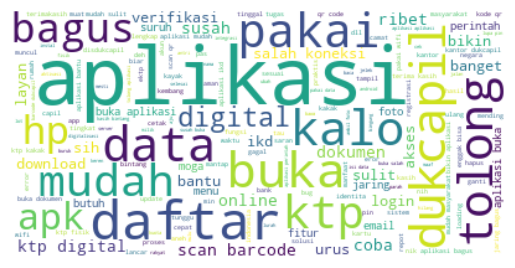

In [26]:
# menampilkan frekuensi kemunculan kata menggunakan wordcloud

words = " ".join(review for review in df['review'])
print(f'Jumlah kata pada dataset adalah {len(words)} kata')

wordcloud = WordCloud(background_color='white').generate(text=words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# memisahkan dataframe untuk sentimen positif

df_positive = df.loc[df['sentiment'] == 1].reset_index()
df_positive = df_positive.drop(columns='index')
df_positive

,review,sentiment
0,konsep aplikasi bagus tingkat mudah akses kone...,1
1,tolong min dokumen buka pas klik dokumen muncu...,1
2,aplikasi buka pakai wifi towertidak buka pakai...,1
3,loding baca muat warna kuning warna hijau baca...,1
4,bagus update menu dokumen data kakak info vaks...,1
...,...,...
2000,mudah ktp digital kakak,1
2001,moga sedia dokumen bpjs dll,1
2002,mudah,1
2003,protes bilang digital kantor tolol nama perint...,1


Jumlah kata pada sentimen positif adalah 94335 kata


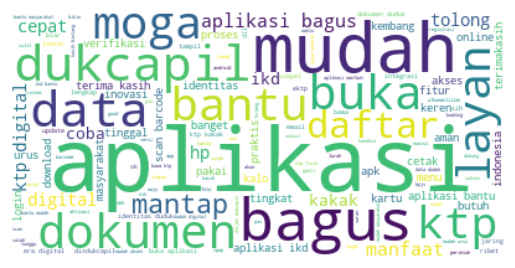

In [28]:
# menampilkan wordcloud untuk sentiment negatif

positive = " ".join(review for review in df_positive['review'])
print(f'Jumlah kata pada sentimen positif adalah {len(positive)} kata')

wordcloud = WordCloud(background_color='white').generate(text=positive)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
# memisahkan dataframe untuk sentimen negatif

df_negative = df.loc[df['sentiment'] == 0].reset_index()
df_negative = df_negative.drop(columns='index')
df_negative

,review,sentiment
0,aplikasi susah fungsi software mudah rumah kan...,0
1,kecewa aplikasi buruk selesai daftar bukatiap ...,0
2,buka pakai wifi kalo pakai paket data pribadi ...,0
3,aplikasi bantu buka dukcapil wajib menginstal ...,0
4,login berkalikali muncul jaring stabil jaring ...,0
...,...,...
4018,harap tinggi aplikasi logo garuda,0
4019,aplikasi pakai force closed ambil foto pas buk...,0
4020,register dukcapil qr sih simplekan biar online...,0
4021,bintang fitur layan fungsi,0


Jumlah kata pada sentimen negatif adalah 297893 kata


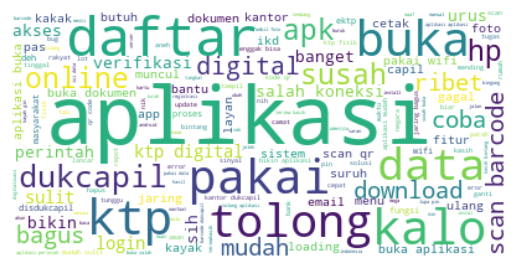

In [30]:
# menampilkan wordcloud untuk sentimen negatif

negative = " ".join(review for review in df_negative['review'])
print(f'Jumlah kata pada sentimen negatif adalah {len(negative)} kata')

wordcloud = WordCloud(background_color='white').generate(text=negative)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
# membagi atribut menjadi features (X) dan label (y)

X = df['review']
y = df['sentiment']

Keterangan:
0 = Negatif
1 = Positif


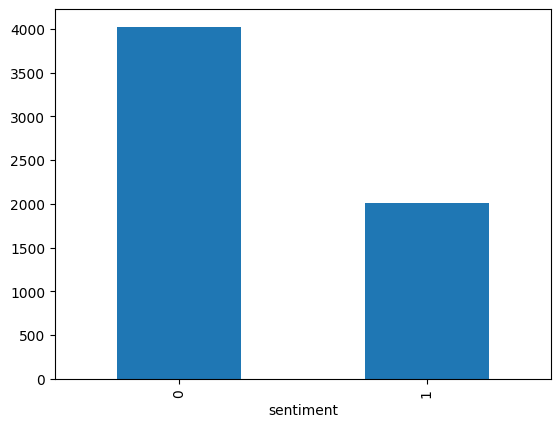

In [32]:
# menampilkan grafik jumlah data pada kolom sentiment

y.value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Negatif')
print('1 = Positif')
plt.show()

## Pembobotan Kata Menggunakan TF-IDF

In [33]:
# melakukan pembobotan kata dengan TF-IDF

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<6028x6896 sparse matrix of type '<class 'numpy.float64'>'
	with 51801 stored elements in Compressed Sparse Row format>

## Menyeimbangkan Data Menggunakan SMOTE

In [34]:
# menyeimbangkan data berdasarkan atribut sentiment atau label (y)

oversampler = SMOTE()
X_tfidf_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

Keterangan:
0 = Negatif
1 = Positif


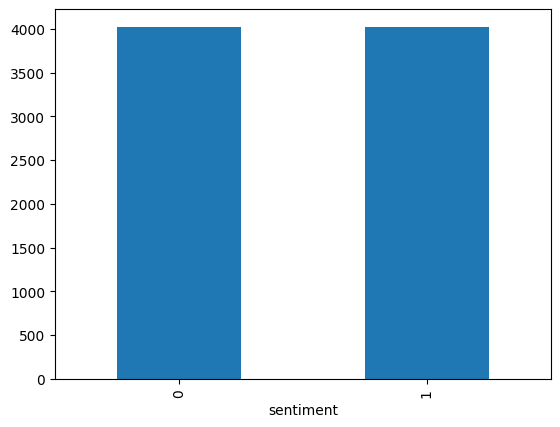

In [35]:
# menampilkan kembali grafik jumlah data pada kolom sentiment

y_resampled.value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Negatif')
print('1 = Positif')
plt.show()

## Pelatihan Model

In [36]:
# membagi data menjadi data latih (training data) dan data uji (test data)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
# deklarasi parameter untuk hyperparameter tuning

param_space = {
    'C': (1e-3, 1e+3, 'log-uniform'),
    'gamma': (1e-3, 1e+3, 'log-uniform'),
    'kernel': ['linear', 'rbf', 'poly'],
}

In [38]:
# inisiasi Bayesian Optimization

model = BayesSearchCV(
    estimator=SVC(),
    search_spaces=param_space,
    n_iter=32,
    cv=3
)

In [39]:
model.fit(X_train, y_train)

print(f'val. score: {model.best_score_}')
print(f'test score: {model.score(X_test, y_test)}')

val. score: 0.8380978760289105
test score: 0.8627329192546583


In [40]:
# mendapatkan informasi parameter terbaik

best_params = model.best_params_
print('Best Parameters:', best_params)

Best Parameters: OrderedDict({'C': 5.424782680309827, 'gamma': 0.040596586953174106, 'kernel': 'rbf'})


## Evaluation

In [42]:
# memeriksa overfit/underfit

training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print('Training accuracy :', training_accuracy)
print('Test accuracy :', test_accuracy)
print('Difference :', training_accuracy - test_accuracy)

Training accuracy : 0.8890615288999378
Test accuracy : 0.8627329192546583
Difference : 0.0263286096452795


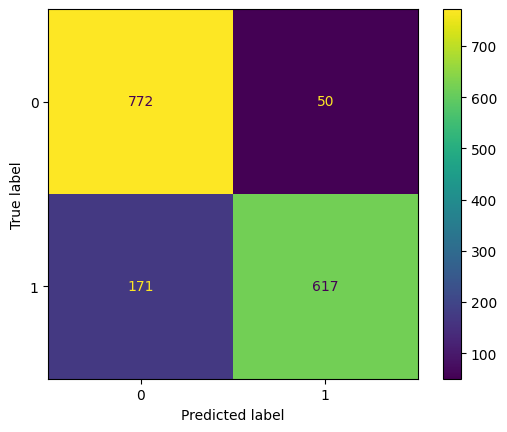

In [43]:
# menampilkan confusion matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [44]:
# melihat hasil laporan klasifikasi

print(classification_report(y_test, y_pred, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.8187    0.9392    0.8748       822
           1     0.9250    0.7830    0.8481       788

    accuracy                         0.8627      1610
   macro avg     0.8719    0.8611    0.8614      1610
weighted avg     0.8707    0.8627    0.8617      1610

